In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Load our dataset and split it to train and test

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train = x_train.astype('float32') / 255.0

y_train = to_categorical(y_train)

11501568/11490434 [==============================] - 0s 0us/step


### Modelling

In [3]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

2022-10-16 15:50:47.213507: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Optimizer

In [4]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32)

2022-10-16 15:50:47.796230: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2295 - accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0731 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0263 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0075 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [6]:
image = random.choice(x_test)

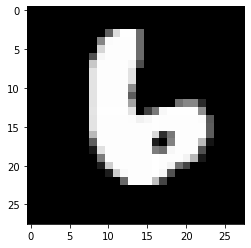

In [7]:
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
image = (image.reshape((1,28,28,1))).astype('float32') /255.0

In [9]:
digit = np.argmax(model.predict(image)[0], axis=-1)

In [10]:
print("Prediction:", digit)

Prediction: 6
